<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Generalized Linear Models

_Authors: Tim Book, Justin Pounders (ATL), Matt Brems_

### Learning Objectives
*After this lesson, students will be able to:*

1. Describe generalized linear models.
2. Fit Poisson and Gamma regression models in `statsmodels`.
3. Interpret coefficients from Poisson and Gamma regression models.
4. Describe iteratively reweighted least squares.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

## Why linear models?

So far, we've learned about a lot of different models:
- linear regression
- logistic regression
- $k$-nearest neighbors
- Naive Bayes models
- decision trees
- bagged tree models
- boosted tree models
- support vector machines

<details><summary>Why might we choose to fit a linear or logistic regression model instead of a different type of model?</summary>
    
- Linear and logistic regression models are very interpretable.
- We can easily quantify the effect of a one-unit change in the independent variables on the dependent variable.
- Because they make so many assumptions, these tend to be simpler models (and thus have lower variance) than other models.
</details>

### Assumptions of a Linear Regression Model
When fitting a linear regression model, there are five assumptions we make:
- Linearity (of Y and $X_i$)
- Independence (of errors)
- Normality (of errors)
- Equality of Variance (of errors)
- Independence (of our independent variables)

## Rewriting the Linear Regression Model

$$
\begin{eqnarray*}
Y_i &=& \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \cdots + \beta_pX_{pi} + \varepsilon_i \\
\varepsilon_i &\sim& N(0, \sigma) \\
\end{eqnarray*}
$$

Visually, we get this:
![](./images/normal_linear_model.jpg)

Rather than write these in two lines, we can combine them into one line:
$$
\begin{eqnarray*}
\Rightarrow Y_i &\sim& N\Big(\beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \cdots + \beta_pX_{pi}, \sigma\Big) \\
\end{eqnarray*}
$$

We can interpret this as:
> "Our observations $Y_i$ follow a Normal distribution with mean $\beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \cdots + \beta_pX_{pi}$ and standard deviation $\sigma$."

## Rewriting the Logistic Regression Model

---

<details><summary>The above model was a pretty poor model for binary data. Why?</summary>

- We would predict values outside of [0,1].
</details>


<details><summary>Previously, when have we used the Bernoulli distribution?</summary>

- We used the Bernoulli distribution to model binary outcomes (success/failure) with a fixed probability of success.
- We can use the Bernoulli distribution to model whether or not one coin flips heads, whether or not one person contracts a disease, or whether or not I eat a burrito today.
</details>

It might make sense that we can rewrite our logistic regression model in the context of the Bernoulli distribution (just like we did with a linear regression model and the Normal distribution)!

We can rewrite that as:
$$
\begin{eqnarray*}
Y_i &\sim& Bernoulli(\pi_i) \\
\pi_i &=& logit^{-1}(\beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \cdots + \beta_pX_{pi})
\end{eqnarray*}
$$


Or, in one line:
$$
\begin{eqnarray*}
Y_i &\sim& Bernoulli\Big(logit^{-1}(\beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \cdots + \beta_pX_{pi})\Big) \\
\end{eqnarray*}
$$

Note that "$logit^{-1}$" is the inverse logit function; you may remember that the logit function was used to bend the "line of best fit" to only make predictions between 0 and 1.

## Generalized Linear Models (GLMs)

**Generalized linear models** describes all models that take the linear regression model and generalizes it to different situations.

- It's not always appropriate for our predictions $\hat{y}$ to range from $(-\infty, \infty)$.

All GLMs will have three components:
- Linear
- Link
- Random

### The Linear Component (aka "Systematic Component")
The **linear component** will always be the linear formula $\beta_0 + \beta_1X_1 + \cdots + \beta_pX_p$.
- This ensures that every GLM will have some interpretation for a one-unit increase in each independent variable.
<details><summary>By the way...</summary>
    Many students have confused the term "linear model" with "no exponentiated terms" - which is wrong. If you include $x_1$ and $x_1^2$ in your model, it's still a linear model, since we can just write $x_2 = x_1^2$. The term <b>linear model</b> comes from the fact that we can always write this systematic component using vectors like $\mathbf{x}^T\beta$
</details>

### The Link Function
The **link function** will transform the linear component into the range of interest.
- In logistic regression, we use the **logit function** as the link function, which ensures our predictions are between 0 and 1. However it's not the only choice. We can use the **probit function**, which is the inverse standard normal CDF.
- In linear regression, the **identity function** is the link function. (i.e. $f(x) = x$)
- The link function is what determines how we interpret a one-unit change in each independent variable!

The linear and link component generate $\hat{Y}_i$ for us. 

![](../images/log_reg.png)

### The Random Component
The **random component** connects our predictions $\hat{Y}_i$ to our observed values $Y_i$ by using a statistical distribution to model our errors. It's "random" because it controls what the noise of our model looks like.
- In linear regression, the linear and link function predict the line of best fit. However, our observed values aren't always on the line; they're Normally distributed around the line.
    * For ordinary least squares linear regression, we use the **normal distribution** for our random component.
- In logistic regression, the linear and link function predict a probability for us. However, our observed values are 1s and 0s. By saying $Y_i \sim \text{Bernoulli}(\pi_i)$, we note that our $Y_i$ will be 1s and 0s that are drawn from a $\text{Bernoulli}(\pi_i)$ distribution with some predicted value between 0 and 1.
    * For logistic regression, we use the **Bernoulli distribution** for our random component

To summarize:
- The linear component will always be $\beta_0 + \beta_1X_1 + \cdots + \beta_pX_p$.
- The link function will bend the linear component to match the desired range of values.
- The random component makes the connection from our predictions to our observed values by summarizing the errors.

## Linear and logistic regression models aren't the only GLMs out there!

We can use all sorts of probability distributions to build out linear models. These linear models still retain the same benefits of linear and logistic regression (i.e. interpretable, can quantify the effect on Y of a one-unit increase in X) but also can model $Y$ variables that aren't just limited to $(-\infty, +\infty)$ or $[0, 1]$.

---

<details><summary>What distribution would you use to model the number of people who drive on the Pennsylvania turnpike (toll road) in the weekend before a holiday? </summary>

- Since the number of people passing through a toll road is countable, we would want to use a discrete distribution.
- Since we can't have a negative number of people passing through a toll road, we would want to use a discrete distribution that can take on only the values of 0, 1, 2, 3, $\ldots$
- Two good distributions for this would be the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) or the [Negative Binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution)!
- You can see more about these distributions [here](https://seeing-theory.brown.edu/probability-distributions/index.html#section2).
- [Wikipedia article for toll roads](https://en.wikipedia.org/wiki/Toll_road).
</details>

---

<details><summary>What distribution would you use to model the amount of time until your Lyft shows up?</summary>

- Since the amount of time until your Lyft shows up is uncountably infinite, we would want to use a continuous distribution.
- Since we can't wait a negative amount of time, we should use a continuous distribution that can only take on the values of $[0, \infty)$.
- The Gamma distribution is going to be 
</details>

## The `statsmodels` API

We will use the `statsmodels` API to explore GLMs in Python.  (`sklearn` does not have a robust implementation for GLMs.)  Documentation and examples for `statsmodels` can be found [here](http://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM).

When we fit a model in `statsmodels`, we need to add the column of 1s so that we can have an intercept. `statsmodels` will not automatically add an intercept for us.

## Poisson Regression

**When do we use it?** When we want to model something on the $\{0,1,2,\ldots\}$ range... like number of cars on through a toll road, number of objects sold or number of awards earned!

<img src="./images/poisson_model.png" alt="poisson_model" width="400"/>

#### Data
We'll rely on UCLA's IDRE module.  This one can be found [here](https://stats.idre.ucla.edu/r/dae/poisson-regression/).

#### Data Description
_The number of awards earned by students at one high school. Predictors of the number of awards earned include the type of program in which the student was enrolled (e.g., vocational, general or academic) and the score on their final exam in math._

In [2]:
# Read in data.
award = pd.read_csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")

# Check first five rows.
award.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


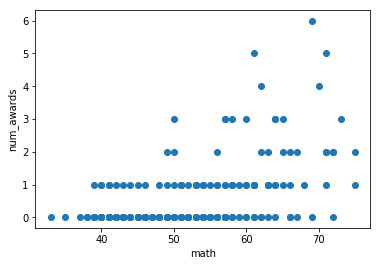

In [6]:
# Plot a scatterplot of math vs. number of awards.
plt.scatter(award['math'],award['num_awards']);
plt.xlabel('math');
plt.ylabel('num_awards');

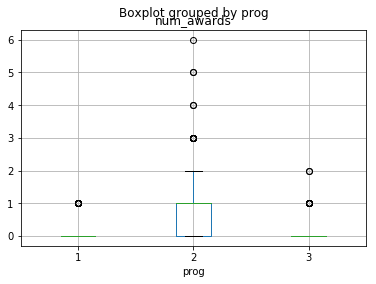

In [11]:
# Plot distribution of awards by program.
award.boxplot(column='num_awards',by='prog');

<details><summary>What might we infer from this plot?</summary>

- `prog` is definitely not linearly related to the number of awards one receives.
- `prog` looks like a categorical variable.
- I am aware of this. I'm going to suspend that knowledge for the sake of example.
</details>

In [14]:
# Set up X, rmb to add a column of constants to the categorical features
award_dummy = pd.get_dummies(data=award,columns=['prog'],drop_first=True)
poi_vars = ['prog_2','prog_3','math']
X = sm.add_constant(award_dummy[poi_vars])
award_dummy.head()

,id,num_awards,math,prog_2,prog_3
0,45,0,41,0,1
1,108,0,41,0,0
2,15,0,44,0,1
3,67,0,42,0,1
4,153,0,40,0,1


In [15]:
# Set up y.
y = award.num_awards

In [38]:
# Fit model. important to choose the right family, in this case it could be...
# poisson (according to cheatsheet, poisson is for infinite no. of categories), or
# ordinal logreg (according to cheatsheet, ordinal logreg is for ordinal categories)
glm_poi = sm.GLM(y,X,family=sm.families.Poisson(link=sm.families.links.log)).fit()
# In statsmodels, y is the first argument.
# In statsmodels, X is the second argument.

In [18]:
# Generate summary of model.
glm_poi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Mon, 09 Dec 2019   Deviance:                       189.45
Time:                        11:32:24   Pearson chi2:                     212.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2471      0.658     -7.969      0.000      -6.538      -3.957
prog_2         1.0839      0.358      3.025      0.002       0.382       1.786
prog_3         0.3698      0.441      0.838      0.402      -0.495       1.234
math           0.0702      0.011      6.619      0.000       0.049       0.091
==============================================================================
"""

Clearly prog_3 has too high a p-value (0.402 >> 0.05, hence statistically insignificant, =its impact on y is insignificant).

#### Interpreting Poisson Coefficients

Because of the log link function, we interpret a one-unit increase in $X_i$ as follows:

"As $X_i$ increases by 1, I expect $Y$ to increase by a factor of $e^{\beta_1}$."

In [20]:
# as math increases by 1 unit, no. of times no. of awards attainable increases by...
np.exp(0.0702)

1.072722704342061

**Example**: For a one-unit increase in `math`, I expect to win $e^{0.0702} \approx 1.07$ times as many awards.

<details><summary>How would you interpret `prog_2`?</summary>
    If you are in Program 2, I expect to win $e^{1.0839} \approx 3$ times as many awards as if you were in Program 1.
</details>

In [21]:
# as prog_2 increases by 1 unit, no. of times no. of awards attainable increases by...
np.exp(1.0839)

2.9561862247436466

## Gamma Regression

**When do we use it?** When we want to model something on the $[0,\infty)$ range... like time until some event occurs!

### The Data
The data used from this example come from a 1945 study about and is inspired by [Peter Craigmile's use](http://www.craigmile.com/peter/teaching/7430/notes/7_gamma_influence.pdf) of this example.

**Data Description:** _“Hurn, et al. (1945) published data on the clotting time of blood, giving clotting time in seconds for normal plasma diluted to nine different percentage concentrations with prothrombin-free plasma; clotting was induced by two lots of thromboplastin.” [McCullagh and Nelder](http://www.utstat.toronto.edu/~brunner/oldclass/2201s11/readings/glmbook.pdf)_

In [23]:
# Read data in.
clot = pd.read_csv("./datasets/clotting.csv", index_col="index")

In [24]:
# Check the first five rows.
clot.head()

,plasma_pct,clot_time,lot
index,,,
1,5,118,1
2,10,58,1
3,15,42,1
4,20,35,1
5,30,27,1


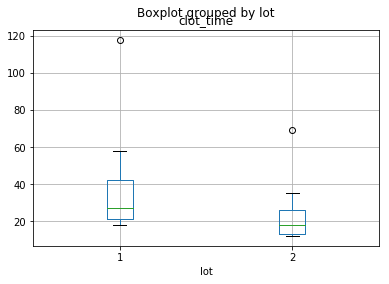

In [25]:
# Generate a boxplot of clot_time group by lot.
clot.boxplot(column='clot_time',by='lot')

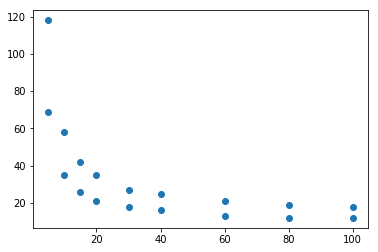

In [27]:
# Plot plasma_pct against clot_time.
plt.scatter(clot['plasma_pct'],clot['clot_time'])

In [50]:
# Set up X.
X = sm.add_constant(clot[['plasma_pct','lot']])

# Set up y.
y = clot.clot_time

In [51]:
# Fit model.
# NOTE: For prediction purposes, the inverse link might actually be best (it's the "canonical link")
# but the log link allows us to interpret our coefficients.
glm_gam = sm.GLM(y,X,family=sm.families.Gamma(link=sm.families.links.log)).fit()
# In statsmodels, y is the first argument.
# In statsmodels, X is the second argument.

In [52]:
# Generate summary of model.
glm_gam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              clot_time   No. Observations:                   18
Model:                            GLM   Df Residuals:                       15
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                         0.16619
Method:                          IRLS   Log-Likelihood:                -65.573
Date:                Mon, 09 Dec 2019   Deviance:                       2.0364
Time:                        13:34:37   Pearson chi2:                     2.49
No. Iterations:                    16   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6597      0.328     14.222      0.000       4.017       5.302
plasma_pct    -0.0156      0.003     -5.084      0.000      -0.022      -0.010
lot           -0.4753      0.192     -2.473      0.013      -0.852      -0.099
==============================================================================
"""

#### Interpreting Gamma Coefficients

Because of the log link function (again!), we interpret a one-unit increase in $X_i$ as follows:

"As $X_i$ increases by 1, I expect $Y$ to increase by a factor of $e^{\beta_1}$."

In [55]:
# Exponentiate our coefficient.
np.exp(-0.0156)
# ??? why my ans different from GA ans

0.9845210497239912

**Example**: For a one-unit increase in `plasma_pct`, I expect the blood will take $e^{-0.0156} \approx 26\%$ as much time to clot.

---
## Iteratively Reweighted Least Squares

When fitting an OLS regression model, we can find our best values for $\beta$ by solving $\hat{\pmb\beta} = (X^TX)^{-1}X^Ty$.

GLMs are typically not "directly solvable." There is [no closed-form solution](http://mathworld.wolfram.com/Closed-FormSolution.html) for generalized linear models!
- This includes logistic regression!

#### How does the algorithm work?
An algorithm called "iteratively reweighted least squares" [has been shown](http://www.utstat.toronto.edu/~brunner/oldclass/2201s11/readings/glmbook.pdf) is "easy" to implement in a computer.
- A solution is initially guessed, then iteratively refined until we converge on an answer.
- IRLS is a special cause of a **gradient descent algorithm**. We'll learn about gradient descent tomorrow.

$$
\begin{eqnarray*}
\hat{\pmb\beta}_{[1]} &=& (X^TW_1X)^{-1}X^TW_1y \\
\Rightarrow \hat{\pmb\beta}_{[2]} &=& (X^TW_2X)^{-1}X^TW_2y \\
\Rightarrow \hat{\pmb\beta}_{[3]} &=& (X^TW_3X)^{-1}X^TW_3y \\
\Rightarrow \hat{\pmb\beta}_{[4]} &=& (X^TW_4X)^{-1}X^TW_4y \\
\Rightarrow \hat{\pmb\beta}_{[5]} &=& (X^TW_5X)^{-1}X^TW_5y \\
&\vdots& \\
\Rightarrow \hat{\pmb\beta}_{[99]} &=& (X^TW_{99}X)^{-1}X^TW_{99}y \\
\Rightarrow \hat{\pmb\beta}_{[100]} &=& (X^TW_{100}X)^{-1}X^TW_{100}y \\
\end{eqnarray*}
$$

- At each step ("iteration"), these weights will change. ("reweighted")

The default maximum number of iterations for GLMs in `statsmodels` is 100. 
- If `No. Iterations` is less than 100, that means the algorithm probably converged.
- If `No. Iterations` is 100, that means the algorithm probably didn't converge and that the $\mathbf{\hat{\beta}}$ are still changing. Therefore, **your output is unreliable - DO NOT USE IT**. It could also give some information on the "flatness" of your error function. Even more than 20 iterations is sketchy.

There are potential pitfalls to this algorithm (some of which we'll cover later). However, what you should know:
- If you get a `ConvergenceWarning` or any indication that your number of iterations is large, that means that your model did not fit properly and that you should not rely on the results!

---

In [ ]:
# Did our results converge?
results.converged

## Summary
Today, we:
* Learned how to generalize two models we already knew (linear and logistic regression) into a borader category of models (GLMs)
* Refamiliarized ourselves with the `statsmodels` API
* Learned the components of GLMs, and how to customize them with `statsmodels`:
    - Systematic/linear component, ie, our choice of x-variables
    - Link function - a function we choose to "bend" our response to our y-variable
    - Random component - The distribution that represents the data-generation process for our y-variable
* Two new linear models:
    - **Poisson regression** - For when your y-variable is Poisson distributed. Most commonly used for _count data_.
        - e.g. Predicting how many children a couple will have based on age and income
    - **Gamma regression** - For when your y-variable is Gamma distributed. Most commonly used for _waiting-time data_.
        - e.g. Predicting how long your phone's battery will last based on screentime use

![](images/glm-sheet.png)

---

## Picking other GLMs (BONUS)

Chosing the right kind of generalized linear model (GLM) from all possibilities really boils down to picking the "error."

The "error" model is really telling you how you expect observations to be distributed.  It is a probability distribution.

> 1. In traditional linear regression, the error term is a normal distribution.  This means that you expect actual observations to be normally distributed around your line.

> 2. In logistic regression, the error term is a Bernoulli distribution.  This means that you expect actual observations to be above (1) or below (0) the logit curve with a certain probability.

Choosing the distribution function often points to a link function you should use: [here is a table](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function).

Examples:

1. If $Y$ is a non-negative integer:
   - Poisson regression if mean $\approx$ variance
   - Negative Binomial regression if variance $\gg$ mean (overdisperse)
   - For example,
     - Units sold
     - Customers through the door
     - Patients to the ER
     - Number of cars racing the red light
2. If $Y$ values represent categories
   - Multinomial logistic regression (unordered categories)
   - Ordinal logstic regression (ordered categories)
   - For example,
     - Does a population tend to buy groceries at Whole Foods, Publix or Kroger?
     - Will millenials vote democrat, republican or independent?
     - Predicting the Amazon star rating of books.
3. If $Y$ values are continuous, non-negative
   - Gamma regression
   - For example,
     - How long before my Uber/Lyft gets here?
     - Home prices

## Analysis of Deviance (BONUS)

We've spoken briefly about deviance before as a generalization of the sums of squares of error for generalized linear models.

Suppose we have two models:

$$
\begin{eqnarray*}
Y_{full} &=& \beta_0 + \beta_1X_1 + \cdots + \beta_kX_k + \cdots + \beta_pX_p + \varepsilon \\
Y_{reduced} &=& \beta_0 + \beta_1X_1 + \cdots + \beta_kX_k + \varepsilon
\end{eqnarray*}
$$

We say that $Y_{reduced}$ is nested in $Y_{full}$, because the reduced model could "fit inside" the full. (You can learn more about nested linear regression models [here](http://people.reed.edu/~jones/Courses/P24.pdf), although the ideas approximately hold for generalized linear models as well.)

When we have one model nested inside the other, there is a statistical test to see if adding new variables are worth it. (Think about it like looking at the difference in mean squared error or $R^2$ by adding a variable, but getting a $p$-value quantifying whether or not it's worth it!)

We calculate the **deviance** of the reduced model and subtract the **deviance** of the full model from it. This difference in deviance follows a [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) with $p-k$ degrees of freedom. (Note that $p-k$ indicates how many variables we took out of our full model to get to the reduced model!)

**This comparison only works with nested models! Do not use if your models are not nested!**

In [ ]:
# Test model differences
from scipy.stats import chi2

grad = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

# First, build our top model
indep_vars = ['gre', 'gpa', 'rank']
X = sm.add_constant(grad[indep_vars])
y = grad.admit

glm_logit = sm.GLM(y, 
                   X,
                   sm.families.Binomial(sm.families.links.logit))
results_logit = glm_logit.fit()


# Next, let's see if we can safely reduce our model
reduced_vars = ['gre', 'gpa']
X_reduced = sm.add_constant(grad[reduced_vars])

results_reduced = sm.GLM(y,
                 X_reduced,
                 sm.families.Binomial(sm.families.links.logit)).fit()
results_reduced.summary()


# Calculate the difference in deviance
D = results_reduced.deviance - results_logit.deviance
print('Difference in Deviance: ', D)

# Check to see if this difference is significant
pval = 1 - chi2.cdf(D, df = 1)
print('p-value of test of difference: ', pval) # What can we conclude here?

$H_0:$ reduced model is better

$H_A:$ reduced model is not better

Because $p < \alpha$, we reject $H_0$ and conclude that the reduced model is not better.